In [74]:
import pandas as pd
data = pd.read_csv('nlp_model.csv')
data

,Unnamed: 0,idea,deal,pitcher_ask_amount,ask_valuation,deal_amount,deal_valuation,bert_features_pca
0,0,Frozen Momos,1,50.0,1000.00,75.0,468.75,-1.272041
1,1,Renting e-bike for mobility in private spaces,1,40.0,266.67,40.0,80.00,4.564833
2,2,Detachable Sleeves,1,25.0,250.00,25.0,83.33,0.964641
3,3,Healthy Potato Chips,1,70.0,7000.00,70.0,2545.45,-1.392708
4,4,Disposable Urine Bag,1,75.0,1875.00,75.0,1250.00,0.137335
...,...,...,...,...,...,...,...,...
60,60,Insoles,1,40.0,400.00,40.0,160.00,-1.565655
61,61,Sportswear,1,40.0,2000.00,60.0,600.00,-1.989561
62,62,VR,1,35.0,3500.00,10.0,100.00,-0.476401
63,63,Bacon Jams,1,40.0,400.00,40.0,200.00,0.514671


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np


In [76]:
y = data['deal_valuation']
x = data.drop('deal_valuation', axis=1)

In [77]:
x

,Unnamed: 0,idea,deal,pitcher_ask_amount,ask_valuation,deal_amount,bert_features_pca
0,0,Frozen Momos,1,50.0,1000.00,75.0,-1.272041
1,1,Renting e-bike for mobility in private spaces,1,40.0,266.67,40.0,4.564833
2,2,Detachable Sleeves,1,25.0,250.00,25.0,0.964641
3,3,Healthy Potato Chips,1,70.0,7000.00,70.0,-1.392708
4,4,Disposable Urine Bag,1,75.0,1875.00,75.0,0.137335
...,...,...,...,...,...,...,...
60,60,Insoles,1,40.0,400.00,40.0,-1.565655
61,61,Sportswear,1,40.0,2000.00,60.0,-1.989561
62,62,VR,1,35.0,3500.00,10.0,-0.476401
63,63,Bacon Jams,1,40.0,400.00,40.0,0.514671


In [78]:
x

,Unnamed: 0,idea,deal,pitcher_ask_amount,ask_valuation,deal_amount,bert_features_pca
0,0,Frozen Momos,1,50.0,1000.00,75.0,-1.272041
1,1,Renting e-bike for mobility in private spaces,1,40.0,266.67,40.0,4.564833
2,2,Detachable Sleeves,1,25.0,250.00,25.0,0.964641
3,3,Healthy Potato Chips,1,70.0,7000.00,70.0,-1.392708
4,4,Disposable Urine Bag,1,75.0,1875.00,75.0,0.137335
...,...,...,...,...,...,...,...
60,60,Insoles,1,40.0,400.00,40.0,-1.565655
61,61,Sportswear,1,40.0,2000.00,60.0,-1.989561
62,62,VR,1,35.0,3500.00,10.0,-0.476401
63,63,Bacon Jams,1,40.0,400.00,40.0,0.514671


In [79]:
x = x.drop(['idea','deal'],axis=1)

In [80]:
y

0      468.75
1       80.00
2       83.33
3     2545.45
4     1250.00
       ...   
60     160.00
61     600.00
62     100.00
63     200.00
64     133.33
Name: deal_valuation, Length: 65, dtype: float64

In [81]:
x = x.drop(['deal_amount','pitcher_ask_amount'], axis=1)

In [82]:
# Normalize the dataset
scaler = StandardScaler()
X_norm = scaler.fit_transform(x)

# Perform k-fold cross-validation
k = 16
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [83]:
x = x.drop(['Unnamed: 0'],axis=1)

In [92]:
x

,ask_valuation,bert_features_pca
0,1000.00,-1.272041
1,266.67,4.564833
2,250.00,0.964641
3,7000.00,-1.392708
4,1875.00,0.137335
...,...,...
60,400.00,-1.565655
61,2000.00,-1.989561
62,3500.00,-0.476401
63,400.00,0.514671


In [84]:
X_norm

array([[-1.70560573, -0.49892812, -0.63049692],
       [-1.65230555, -0.79386976,  2.26259531],
       [-1.59900537, -0.80057435,  0.47813198],
       [-1.54570519,  1.91424172, -0.69030683],
       [-1.49240501, -0.14700752,  0.06807103],
       [-1.43910484,  0.10436434, -1.20690183],
       [-1.38580466, -0.63299178, -0.62831517],
       [-1.33250448, -0.14700752, -0.18237598],
       [-1.2792043 ,  3.12082664,  1.98065872],
       [-1.22590412, -0.53914762,  2.06317879],
       [-1.17260394, -0.70002561,  0.58753682],
       [-1.11930376,  2.11533921, -0.09167364],
       [-1.06600358, -0.09673315, -0.64254632],
       [-1.0127034 , -0.60081618, -0.45975627],
       [-0.95940322, -0.49892812, -0.93191574],
       [-0.90610304, -0.49892812, -0.44123675],
       [-0.85280287, -0.09673315, -1.05684816],
       [-0.79950269, -0.70002561, -0.84302011],
       [-0.74620251, -0.65980611, -0.95379154],
       [-0.69290233, -0.29783064, -0.22500252],
       [-0.63960215, -0.49892812, -1.359

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb



In [86]:
mse_scores = []
for train_index, test_index in kf.split(X_norm):
    X_train, X_test = X_norm[train_index], X_norm[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Select a regression model
    model = LinearRegression()
    model2 =RandomForestRegressor(n_estimators=10, random_state=42)
    svr = SVR(kernel='rbf')
    svr.fit(X_train, y_train)
    # Train the model
    model.fit(X_train, y_train)
    model2.fit(X_train, y_train)
    xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42,learning_rate=0.01, reg_alpha= 0.1,
    reg_lambda= 0.001, max_depth =10)
    xgb_reg.fit(X_train, y_train)

    # Making predictions on test data
    y_pred_xg = xgb_reg.predict(X_test)
    mse4=mean_squared_error(y_test, y_pred_xg)
    # Evaluate the model
    y_pred_lr = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_lr)
    y_pred_rf = model2.predict(X_test)
    mse2 = mean_squared_error(y_test, y_pred_rf)
    y_pred_svr = svr.predict(X_test)
    mse3 = mean_squared_error(y_test, y_pred_svr)
    mse_scores.append(mse4)

# Calculate the mean and standard deviation of the MSE scores
mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)
r2 = r2_score(y_test, y_pred_xg)
print("R2_score",r2)
print('Mean squared error: ', mse_mean, '+/-', mse_std)

R2_score 0.8779469652100438
Mean squared error:  1806519.0527995005 +/- 2740355.1612076373


In [87]:
from sklearn.metrics import mean_absolute_error

# y_true: actual values, y_pred: predicted values
mae = mean_absolute_error(y_test, y_pred_xg)

print("Mean Absolute Error: ", mae)

Mean Absolute Error:  181.10028358459476


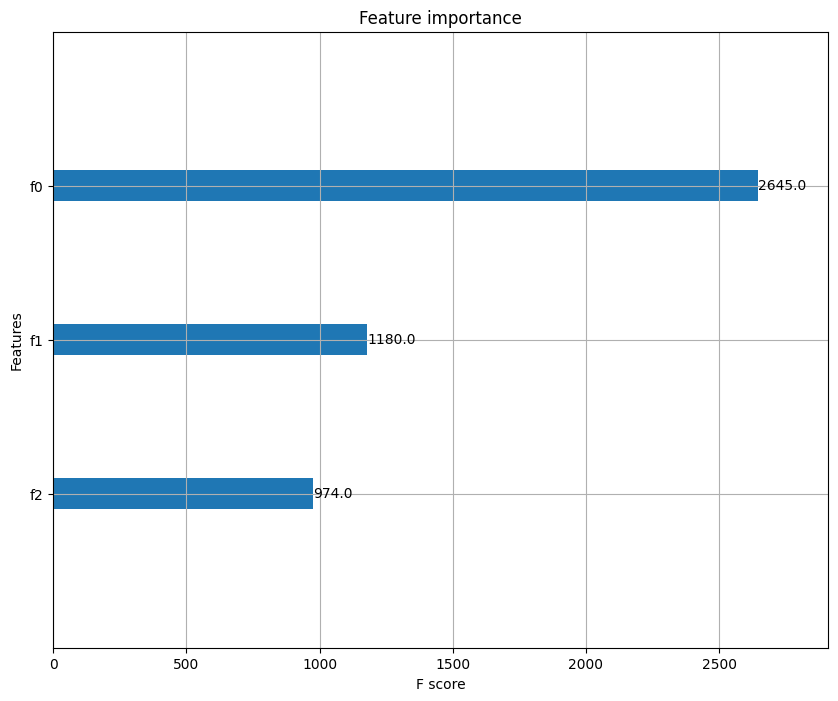

In [88]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_reg, ax=ax)
plt.show()

In [89]:
from sklearn.ensemble import BaggingRegressor
# Create the ensemble using bagging
# base_models = [model2,xgb_reg]

ensemble = BaggingRegressor(base_estimator=model2, n_estimators=42, max_features=3)

# Add the XGBoost model to the ensemble
# ensemble.estimators_.append(xgb_reg)
ensemble.estimators_ = [xgb_reg,svr]

# Train and evaluate the ensemble
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("R2 score: ", r2)
mae2 = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error: ", mae2)


c:\Users\manya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean squared error:  238786.99575567897
R2 score:  0.6627831933356905
Mean Absolute Error:  415.6048154761904


In [90]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Define the base models
model1 = LinearRegression()
model2 = DecisionTreeRegressor()

# Create the ensemble using GradientBoostingRegressor
ensemble2 = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=10, warm_start=True)

# Train the ensemble with the first base model
ensemble2.fit(X_train, y_train)

# Train the ensemble with the second base model
ensemble2.set_params(n_estimators=ensemble.n_estimators + 50) # increase the number of estimators
ensemble2.fit(X_train, y_train)

# Evaluate the ensemble
y_pred_es = ensemble2.predict(X_test)
mse = mean_squared_error(y_test, y_pred_es)
r2 = r2_score(y_test, y_pred_es)
print("Mean squared error: ", mse)
print("R2 score: ", r2*100)
mae3 = mean_absolute_error(y_test, y_pred_es)
print("Mean Absolute Error: ", mae3)

Mean squared error:  111400.75639953362
R2 score:  84.26790068104204
Mean Absolute Error:  289.69538998296804


In [91]:
import joblib
joblib.dump(ensemble2, 'C:/Users/manya/dAppF/dAppFund/description_model.pkl')

['C:/Users/manya/dAppF/dAppFund/description_model.pkl']